<h1>Feature Selection and Scaling<h1>

  
 <h5>Anas Ba Ragaa _ B00075797<h5>
 <h5>Rayan Ben Daya _ B00073990 <h5>
 <h5>Rashid Alnuaimi  _ B00071921<h5>

In [1]:
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
import pandas as pd

def save_array(a,filename):
    with open(filename, 'wb') as f:
        np.save(f, a)
def read_array(filename):
    with open(filename, 'rb') as f:
        a = np.load(f)
    return a


X_FILE='x_file.txt'
Y_FILE='y_file.txt'

In [ ]:

##################################
        #Loading and Encodign #
####################################
#Machine Learning

#part 1
input_file = "Churn_Modelling.csv"
# reading file to pandas dataframe
df_ori = pd.read_csv(input_file, header = 0)
# dropping the unrelated columns
df=df_ori.drop(columns=['CustomerId', 'Surname','RowNumber'])
# Encoding the catogerical features to numerical by replacing their values with numbers
df=df.replace(["Female","Male"],[1,0])
df=df.replace(["France","Spain","Germany",],[0,1,2])
#dataset after manipulation

# Sampling to make the data balanced
df=df.sample(frac=1).groupby('Exited', sort=False).head(2000)
df
y=df['Exited'].to_numpy()
y=y.astype(int)
x=df.drop(columns=['Exited']).to_numpy()
x=x.astype(int)
x
# run only once to save file for consistency
save_array(y,Y_FILE)
save_array(x,X_FILE)





In [4]:
#Loading x and y from files
X=read_array(X_FILE)
Y=read_array(Y_FILE)

print (x.shape)
print(y.shape)

(6037, 10)
(6037,)


In [5]:


from sklearn import preprocessing
#Part one

mm_scaler = preprocessing.MinMaxScaler()
x = mm_scaler.fit_transform(X)

y=Y



In [15]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt  
from sklearn.model_selection import cross_val_predict
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
metric = ['precision_macro', 'recall_macro', 'f1_macro', 'accuracy','time' ]
# show confusion matrix
def plot_cm(cm):
    sn.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')
    plt.show()
# do cross validation and return results     
def report_metrics(model,x,y, k=10 ):
   
    drop=[]
    s = cross_validate(model,x,y,cv=k, scoring=metric, return_train_score= True)
    y_pred=cross_val_predict(model, x, y, cv=k)  
    cm=confusion_matrix(y, y_pred)  
    tpr=cm[0][0]/(cm[0][1]+cm[0][0])
    tnr=cm[1][1]/(cm[1][0]+cm[1][1])
    
    
    s['tpr']=np.array([tpr])
    s['tnr']=np.array([tnr])
    return s,cm

**Part 2**

First Classifier : DecisionTree with max depth set to 5 and default number of splits

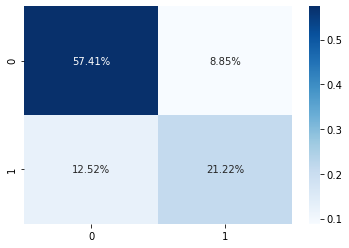

In [16]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(max_depth=5)
s,cm = report_metrics(clf,x,y,10)
plot_cm(cm)


In [17]:
# Printing results from 10 folds
for k,v in s.items():
    print (k ,' = ' , v )

fit_time  =  [0.01296377 0.0135622  0.01100326 0.01262736 0.0153935  0.0119679
 0.01203108 0.01296067 0.01182151 0.01197171]
score_time  =  [0.00401974 0.00405884 0.00301385 0.00598335 0.0020206  0.00299287
 0.00296807 0.003016   0.00299144 0.00199461]
test_precision_macro  =  [0.76506827 0.78481973 0.76306502 0.7428601  0.74171843 0.76225547
 0.79250916 0.74758454 0.79479922 0.761412  ]
train_precision_macro  =  [0.77374997 0.77545726 0.76993472 0.77216171 0.77957622 0.78546615
 0.77414842 0.77257375 0.77163171 0.77042596]
test_recall_macro  =  [0.74387255 0.75752451 0.7667402  0.74458333 0.72892157 0.72080882
 0.75156863 0.74993842 0.76038177 0.75262315]
train_recall_macro  =  [0.76216335 0.75720949 0.76545054 0.76818331 0.75025732 0.74763457
 0.74828787 0.76639737 0.74700503 0.76769357]
test_f1_macro  =  [0.75201072 0.76762975 0.76480609 0.74369824 0.73422178 0.73315926
 0.76493212 0.74871921 0.77248244 0.75654207]
train_f1_macro  =  [0.76719844 0.76457082 0.76756829 0.77007531 0.76

In [20]:
print ('Tree Classifier Average after 10 folds : ' )
for k,v in s.items():
    print ('Average',k ,' = ' , v.sum()/len(v))


Tree Classifier Average after 10 folds : 
Average fit_time  =  0.012630295753479005
Average score_time  =  0.003305935859680176
Average test_precision_macro  =  0.7656091939706056
Average train_precision_macro  =  0.7745125885685299
Average test_recall_macro  =  0.7476962957596832
Average train_recall_macro  =  0.7580282408093233
Average test_f1_macro  =  0.7538201658360306
Average train_f1_macro  =  0.7642716007968356
Average test_accuracy  =  0.786319231656288
Average train_accuracy  =  0.795115378484555
Average tpr  =  0.8665
Average tnr  =  0.6288659793814433


Second classifier KNN wirt N=18

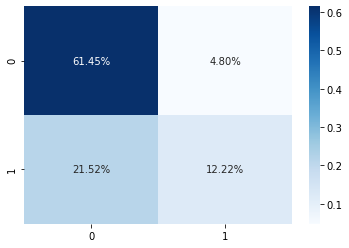

In [27]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=18)
s,cm = report_metrics(clf,x,y,10)
plot_cm(cm)

In [28]:
# Printing results from 10 folds
print ('KNN Classifier Results after 10 folds : ' )

for k,v in s.items():
    print (k ,' = ' , v )

KNN Classifier Results after 10 folds : 
fit_time  =  [0.0260191  0.01994252 0.02484155 0.01802588 0.02051473 0.02002835
 0.01909065 0.01901889 0.02097702 0.02197289]
score_time  =  [0.04716063 0.06808829 0.05656672 0.05210948 0.05185795 0.04797363
 0.043998   0.04702353 0.0537734  0.04688811]
test_precision_macro  =  [0.7470399  0.75093998 0.72146707 0.75127133 0.70507937 0.68728223
 0.75118516 0.71927793 0.73847792 0.73051878]
train_precision_macro  =  [0.76566173 0.7585597  0.75835848 0.76346474 0.76172052 0.76428966
 0.76236554 0.75746921 0.76433228 0.75725458]
test_recall_macro  =  [0.65622549 0.66112745 0.63897059 0.65017157 0.62666667 0.62647059
 0.63311275 0.64226601 0.65586823 0.65825739]
train_recall_macro  =  [0.66874045 0.67099154 0.67315876 0.67116544 0.67142321 0.6774093
 0.67142821 0.66707924 0.67363777 0.66125121]
test_f1_macro  =  [0.66590867 0.67168123 0.64549367 0.65853157 0.63076386 0.63143555
 0.6366773  0.64973861 0.6656754  0.6683439 ]
train_f1_macro  =  [0.68072

In [29]:
print ('KNN Classifier Average after 10 folds : ' )
for k,v in s.items():
    print ('Average',k ,' = ' , v.sum()/len(v))


KNN Classifier Average after 10 folds : 
Average fit_time  =  0.021043157577514647
Average score_time  =  0.05154397487640381
Average test_precision_macro  =  0.7302539662425038
Average train_precision_macro  =  0.7613476441270817
Average test_recall_macro  =  0.6449136723654979
Average train_recall_macro  =  0.6706285144934649
Average test_f1_macro  =  0.6524249760381741
Average train_f1_macro  =  0.6827864258984052
Average test_accuracy  =  0.7367914840807002
Average train_accuracy  =  0.7574587468001981
Average tpr  =  0.9275
Average tnr  =  0.36229749631811486


**Part 3**

**Finding the threshold for feature selection without losing accuracy**

In [ ]:

best_acc=0
best_index=None
res=[]
for i in range(1,11):
    from sklearn.feature_selection import SelectKBest, SelectPercentile, chi2, f_classif,f_regression
    x_temp = SelectKBest(chi2, k=i).fit_transform(x, y)
    clf = KNeighborsClassifier(n_neighbors=18)
    s,_ = report_metrics(clf,x_temp,y,5)
    res.append(s['test_accuracy'].sum()/len(s['test_accuracy']))
    if(s['test_accuracy'].sum()/len(s['test_accuracy'])) > best_acc:
        best_index=i
        best_acc=s['test_accuracy'].sum()/len(s['test_accuracy'])

No handles with labels found to put in legend.


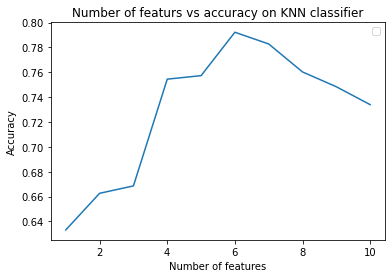

In [54]:
#Plotting some results



x_axis=[i for i in range(1,11)]           
plt.plot(x_axis, res,  )
        
plt.xlabel("Number of features")
plt.ylabel("Accuracy")
plt.title("Number of featurs vs accuracy on KNN classifier")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend()
  
# To load the display window
plt.show()

In [55]:
from sklearn.feature_selection import SelectKBest, SelectPercentile, chi2, f_classif,f_regression
x_new = SelectKBest(chi2, k=6).fit_transform(x, y)
print("Dataset size after feature selection is: ", x_new.shape)


Dataset size after feature selection is:  (6037, 6)


**Part 4**

First Classifier : DecisionTree with max depth set to 5 and default number of splits

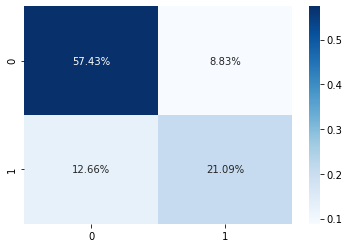

Tree Classifier Results after 10 folds : 
fit_time  =  [0.00697279 0.00498557 0.00499368 0.00503445 0.00495052 0.00750327
 0.00598383 0.00562477 0.00599122 0.00498629]
score_time  =  [0.00398993 0.0030272  0.00199389 0.00199485 0.00300646 0.00299406
 0.00376296 0.00201607 0.00301003 0.00299263]
test_precision_macro  =  [0.76506827 0.78650919 0.75939685 0.74093137 0.7361454  0.76490066
 0.78820587 0.74758454 0.79479922 0.75960432]
train_precision_macro  =  [0.77265643 0.7744353  0.76891892 0.77101385 0.7787361  0.78472106
 0.77313289 0.77104635 0.77059762 0.7696114 ]
test_recall_macro  =  [0.74387255 0.75997549 0.76183824 0.74093137 0.72156863 0.72205882
 0.74786765 0.74993842 0.76038177 0.7501601 ]
train_recall_macro  =  [0.76120113 0.7559795  0.76422054 0.76627887 0.7493001  0.74654346
 0.74638343 0.76394887 0.74577563 0.76673679]
test_f1_macro  =  [0.75201072 0.76990476 0.76057472 0.74093137 0.72740844 0.73471592
 0.7609814  0.74871921 0.77248244 0.75433109]
train_f1_macro  =  [0.766

In [56]:
clf = tree.DecisionTreeClassifier(max_depth=5)
s,cm = report_metrics(clf,x_new,y,10)
plot_cm(cm)
print ('Tree Classifier Results after 10 folds : ' )

for k,v in s.items():
    print (k ,' = ' , v )
    
print ('Tree Classifier Average after 10 folds : ' )

for k,v in s.items():
    print ('Average',k ,' = ' , v.sum()/len(v))

Second classifier KNN wirt N=18

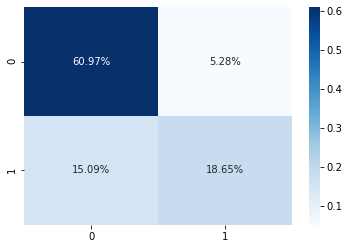

KNN Classifier Results after 10 folds : 
fit_time  =  [0.01995349 0.0139997  0.01591754 0.01496005 0.01399755 0.01396251
 0.01494312 0.01474714 0.01403594 0.01525927]
score_time  =  [0.05213237 0.0408957  0.02935576 0.03490663 0.04659629 0.02915764
 0.02907228 0.02903008 0.03091598 0.02967024]
test_precision_macro  =  [0.78590061 0.8190198  0.80086207 0.77691383 0.77443997 0.79019572
 0.79451477 0.79342207 0.80366094 0.77263909]
train_precision_macro  =  [0.81487317 0.80861518 0.81569845 0.80939086 0.8163685  0.81181336
 0.81502272 0.81292965 0.8088861  0.81493716]
test_recall_macro  =  [0.74176471 0.74090686 0.7395098  0.72585784 0.73796569 0.73330882
 0.72240196 0.75302956 0.75067734 0.7197968 ]
train_recall_macro  =  [0.75852791 0.75128182 0.75826514 0.75481292 0.75732292 0.75361793
 0.75717403 0.75658866 0.75248379 0.75823473]
test_f1_macro  =  [0.75546317 0.75998575 0.75613695 0.74009894 0.74992094 0.74888349
 0.73929487 0.76637116 0.7665287  0.7340706 ]
train_f1_macro  =  [0.7753

In [57]:
clf = KNeighborsClassifier(n_neighbors=18)
s,cm = report_metrics(clf,x_new,y,10)
plot_cm(cm)
print ('KNN Classifier Results after 10 folds : ' )

for k,v in s.items():
    print (k ,' = ' , v )
    
print ('KNN Classifier Average after 10 folds : ' )

for k,v in s.items():
    print ('Average',k ,' = ' , v.sum()/len(v))

**Part 5**

In [41]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
x_pca=pca.fit_transform(x);

exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

print( 'Explained Variance : ',exp_var_pca)
print('Cummulative sum : ',cum_sum_eigenvalues)


Explained Variance :  [0.2095487  0.20188883 0.17074736 0.15590556 0.06974644 0.068142
 0.04815394 0.030937   0.02808217 0.016848  ]
Cummulative sum :  [0.2095487  0.41143753 0.58218489 0.73809045 0.80783689 0.87597889
 0.92413283 0.95506983 0.983152   1.        ]


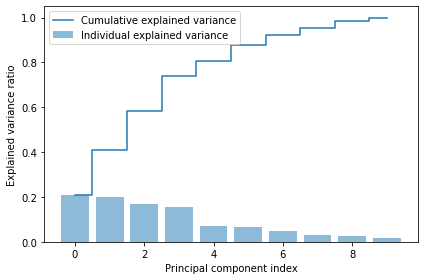

In [42]:
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

We can see that the first 4 components explain more than 73% of the variance 

In [39]:
pca = PCA(n_components=4)
x_pca=pca.fit_transform(x);
print(x_pca.shape)

(6037, 4)


**Part 6**

First Classifier : DecisionTree with max depth set to 5 and default number of splits

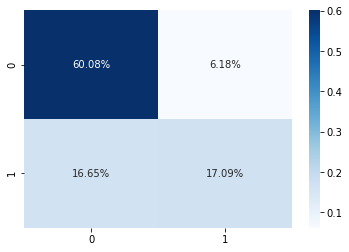

Tree Classifier Results after 10 folds : 
fit_time  =  [0.03889799 0.02991962 0.0289216  0.03298497 0.0289216  0.03191447
 0.02892208 0.02747965 0.0275557  0.03018355]
score_time  =  [0.00298953 0.00299287 0.00199509 0.00299239 0.00299191 0.00299215
 0.00299263 0.00299215 0.00199389 0.00299168]
test_precision_macro  =  [0.73962482 0.79305307 0.77113802 0.76092565 0.70660291 0.74480431
 0.80085742 0.78403209 0.77553265 0.75236803]
train_precision_macro  =  [0.77321319 0.80107284 0.79992499 0.79377293 0.76915642 0.8031414
 0.79902339 0.81083312 0.79559024 0.7910845 ]
test_recall_macro  =  [0.7035049  0.71629902 0.69539216 0.72806373 0.69801471 0.6817402
 0.73220588 0.70274015 0.70512931 0.70737069]
train_recall_macro  =  [0.73355406 0.72911302 0.73032301 0.73907074 0.7386318  0.73279301
 0.7408863  0.71671316 0.73636784 0.74605886]
test_f1_macro  =  [0.7141768  0.73316767 0.71011227 0.73892328 0.70165566 0.69413718
 0.74941168 0.71880621 0.72048568 0.71976275]
train_f1_macro  =  [0.74606

In [47]:
clf = tree.DecisionTreeClassifier(max_depth=5)
s,cm = report_metrics(clf,x_pca,y,10)
plot_cm(cm)
print ('Tree Classifier Results after 10 folds : ' )

for k,v in s.items():
    print (k ,' = ' , v )
    
print ('Tree Classifier Average after 10 folds : ' )

for k,v in s.items():
    print ('Average',k ,' = ' , v.sum()/len(v))

Second classifier KNN wirt N=18

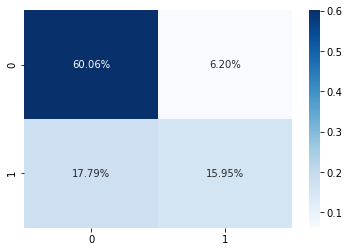

KNN Classifier Results after 10 folds : 
fit_time  =  [0.02094269 0.01102018 0.02080894 0.01201272 0.01394057 0.01293445
 0.01396346 0.01307297 0.01300788 0.01403427]
score_time  =  [0.04959369 0.02800941 0.02792525 0.02715969 0.02894139 0.02799153
 0.03194022 0.02995992 0.02804279 0.03612399]
test_precision_macro  =  [0.77517839 0.75795311 0.73869441 0.76199506 0.73209985 0.75348021
 0.76062549 0.7261129  0.72394345 0.73660907]
train_precision_macro  =  [0.77182572 0.77440625 0.76922054 0.76321204 0.77597772 0.77181801
 0.7704229  0.77318684 0.7707639  0.76617744]
test_recall_macro  =  [0.71125    0.69039216 0.6792402  0.69894608 0.69370098 0.69034314
 0.68433824 0.67777709 0.68141626 0.68887931]
train_recall_macro  =  [0.7064764  0.70907529 0.70699195 0.70489862 0.71383138 0.70823695
 0.71038916 0.7112294  0.70673876 0.71061205]
test_f1_macro  =  [0.7263216  0.70398288 0.69113342 0.71292678 0.7043094  0.703571
 0.69784681 0.68871077 0.69197473 0.70054627]
train_f1_macro  =  [0.721359

In [48]:
clf = KNeighborsClassifier(n_neighbors=18)
s,cm = report_metrics(clf,x_new,y,10)
plot_cm(cm)
print ('KNN Classifier Results after 10 folds : ' )

for k,v in s.items():
    print (k ,' = ' , v )
    
print ('KNN Classifier Average after 10 folds : ' )

for k,v in s.items():
    print ('Average',k ,' = ' , v.sum()/len(v))

In [49]:
print(s['test_accuracy'].sum()/len(s['test_accuracy']))

0.760141071683525
